In [199]:
import numpy as np
import pandas as pd
import talib as ta
from pandas_datareader import data as pdr
import datetime
from scipy import stats
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [200]:
stocks = ['^NSEI', '^SPX', '^NDX', '^RUT', 'YM=F', 'CL=F','GC=F','SI=F','EURUSD=X','^TNX','^VIX','GBPUSD=X','GBPUSD=X','BTC-USD','^CMC200','^FTSE','^N225','JPY=X']

In [201]:
data = yf.download(tickers = " ".join(stocks),
                  period = "1y",
                  interval = "1d",
                  group_by = "ticker",
                  auto_adjust = False,
                  threads = True,
                  proxy = None,
                  )

[*********************100%***********************]  17 of 17 completed


In [202]:
data

^N225                              \
                                   Open          High           Low   
Date                                                                  
2022-01-31 15:00:00+00:00  27167.140625  27410.789062  27016.710938   
2022-01-31 18:30:00+00:00           NaN           NaN           NaN   
2022-02-01 00:00:00+00:00           NaN           NaN           NaN   
2022-02-01 05:00:00+00:00           NaN           NaN           NaN   
2022-02-01 15:00:00+00:00  27302.990234  27564.619141  27289.160156   
...                                 ...           ...           ...   
2023-01-31 05:00:00+00:00           NaN           NaN           NaN   
2023-01-31 15:00:00+00:00  27483.410156  27547.669922  27322.789062   
2023-01-31 18:30:00+00:00           NaN           NaN           NaN   
2023-02-01 00:00:00+00:00           NaN           NaN           NaN   
2023-02-01 05:00:00+00:00           NaN           NaN           NaN   

                                                                   \
                                  Close     Adj Close      Volume   
Date                                                                
2022-01-31 15:00:00+00:00  27078.480469  27078.480469  81100000.0   
2022-01-31 18:30:00+00:00           NaN           NaN         NaN   
2022-02-01 00:00:00+00:00           NaN           NaN         NaN   
2022-02-01 05:00:00+00:00           NaN           NaN         NaN   
2022-02-01 15:00:00+00:00  27533.599609  27533.599609  85200000.0   
...                                 ...           ...         ...   
2023-01-31 05:00:00+00:00           NaN           NaN         NaN   
2023-01-31 15:00:00+00:00  27346.880859  27346.880859         0.0   
2023-01-31 18:30:00+00:00           NaN           NaN         NaN   
2023-02-01 00:00:00+00:00           NaN           NaN         NaN   
2023-02-01 05:00:00+00:00           NaN           NaN         NaN   

                                 ^FTSE                                         \
                                  Open         High          Low        Close   
Date                                                                            
2022-01-31 15:00:00+00:00          NaN          NaN          NaN          NaN   
2022-01-31 18:30:00+00:00          NaN          NaN          NaN          NaN   
2022-02-01 00:00:00+00:00  7464.399902  7549.299805  7463.000000  7535.799805   
2022-02-01 05:00:00+00:00          NaN          NaN          NaN          NaN   
2022-02-01 15:00:00+00:00          NaN          NaN          NaN          NaN   
...                                ...          ...          ...          ...   
2023-01-31 05:00:00+00:00          NaN          NaN          NaN          NaN   
2023-01-31 15:00:00+00:00          NaN          NaN          NaN          NaN   
2023-01-31 18:30:00+00:00          NaN          NaN          NaN          NaN   
2023-02-01 00:00:00+00:00  7771.700195  7798.509766  7771.609863  7786.450195   
2023-02-01 05:00:00+00:00          NaN          NaN          NaN          NaN   

                           ...         ^NSEI                              \
                           ...           Low         Close     Adj Close   
Date                       ...                                             
2022-01-31 15:00:00+00:00  ...           NaN           NaN           NaN   
2022-01-31 18:30:00+00:00  ...  17244.550781  17576.849609  17576.849609   
2022-02-01 00:00:00+00:00  ...           NaN           NaN           NaN   
2022-02-01 05:00:00+00:00  ...           NaN           NaN           NaN   
2022-02-01 15:00:00+00:00  ...           NaN           NaN           NaN   
...                        ...           ...           ...           ...   
2023-01-31 05:00:00+00:00  ...           NaN           NaN           NaN   
2023-01-31 15:00:00+00:00  ...           NaN           NaN           NaN   
2023-01-31 18:30:00+00:00  ...  17353.400391  17616.300781  17616.300781   
2023-02-01 00:00:00+00:00

In [203]:
data

^N225                              \
                                   Open          High           Low   
Date                                                                  
2022-01-31 15:00:00+00:00  27167.140625  27410.789062  27016.710938   
2022-01-31 18:30:00+00:00           NaN           NaN           NaN   
2022-02-01 00:00:00+00:00           NaN           NaN           NaN   
2022-02-01 05:00:00+00:00           NaN           NaN           NaN   
2022-02-01 15:00:00+00:00  27302.990234  27564.619141  27289.160156   
...                                 ...           ...           ...   
2023-01-31 05:00:00+00:00           NaN           NaN           NaN   
2023-01-31 15:00:00+00:00  27483.410156  27547.669922  27322.789062   
2023-01-31 18:30:00+00:00           NaN           NaN           NaN   
2023-02-01 00:00:00+00:00           NaN           NaN           NaN   
2023-02-01 05:00:00+00:00           NaN           NaN           NaN   

                                                                   \
                                  Close     Adj Close      Volume   
Date                                                                
2022-01-31 15:00:00+00:00  27078.480469  27078.480469  81100000.0   
2022-01-31 18:30:00+00:00           NaN           NaN         NaN   
2022-02-01 00:00:00+00:00           NaN           NaN         NaN   
2022-02-01 05:00:00+00:00           NaN           NaN         NaN   
2022-02-01 15:00:00+00:00  27533.599609  27533.599609  85200000.0   
...                                 ...           ...         ...   
2023-01-31 05:00:00+00:00           NaN           NaN         NaN   
2023-01-31 15:00:00+00:00  27346.880859  27346.880859         0.0   
2023-01-31 18:30:00+00:00           NaN           NaN         NaN   
2023-02-01 00:00:00+00:00           NaN           NaN         NaN   
2023-02-01 05:00:00+00:00           NaN           NaN         NaN   

                                 ^FTSE                                         \
                                  Open         High          Low        Close   
Date                                                                            
2022-01-31 15:00:00+00:00          NaN          NaN          NaN          NaN   
2022-01-31 18:30:00+00:00          NaN          NaN          NaN          NaN   
2022-02-01 00:00:00+00:00  7464.399902  7549.299805  7463.000000  7535.799805   
2022-02-01 05:00:00+00:00          NaN          NaN          NaN          NaN   
2022-02-01 15:00:00+00:00          NaN          NaN          NaN          NaN   
...                                ...          ...          ...          ...   
2023-01-31 05:00:00+00:00          NaN          NaN          NaN          NaN   
2023-01-31 15:00:00+00:00          NaN          NaN          NaN          NaN   
2023-01-31 18:30:00+00:00          NaN          NaN          NaN          NaN   
2023-02-01 00:00:00+00:00  7771.700195  7798.509766  7771.609863  7786.450195   
2023-02-01 05:00:00+00:00          NaN          NaN          NaN          NaN   

                           ...         ^NSEI                              \
                           ...           Low         Close     Adj Close   
Date                       ...                                             
2022-01-31 15:00:00+00:00  ...           NaN           NaN           NaN   
2022-01-31 18:30:00+00:00  ...  17244.550781  17576.849609  17576.849609   
2022-02-01 00:00:00+00:00  ...           NaN           NaN           NaN   
2022-02-01 05:00:00+00:00  ...           NaN           NaN           NaN   
2022-02-01 15:00:00+00:00  ...           NaN           NaN           NaN   
...                        ...           ...           ...           ...   
2023-01-31 05:00:00+00:00  ...           NaN           NaN           NaN   
2023-01-31 15:00:00+00:00  ...           NaN           NaN           NaN   
2023-01-31 18:30:00+00:00  ...  17353.400391  17616.300781  17616.300781   
2023-02-01 00:00:00+00:00

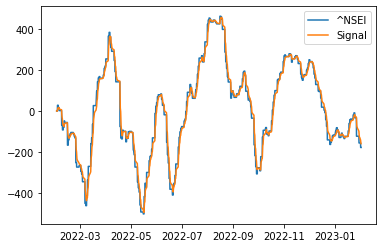

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


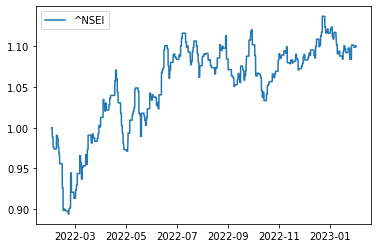

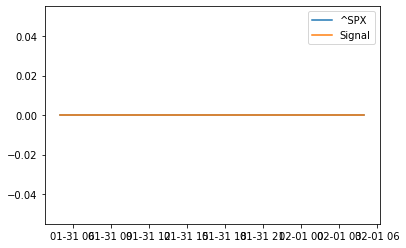

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


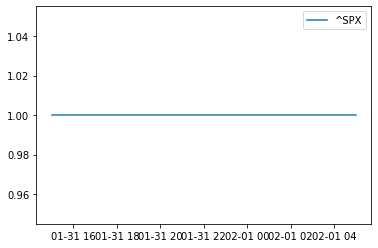

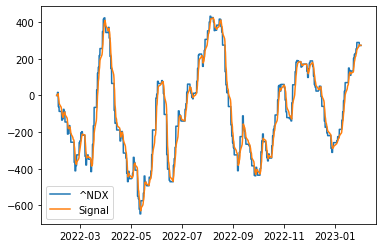

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


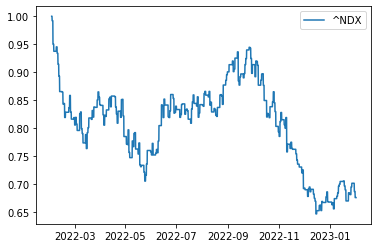

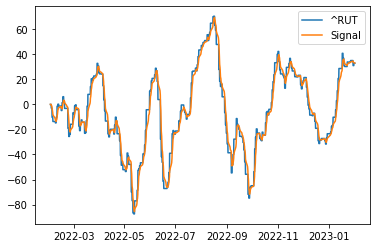

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


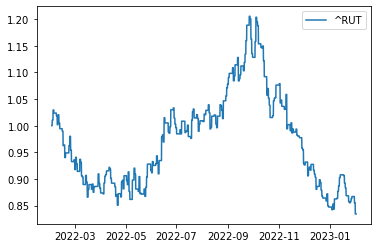

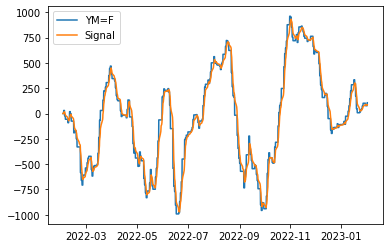

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


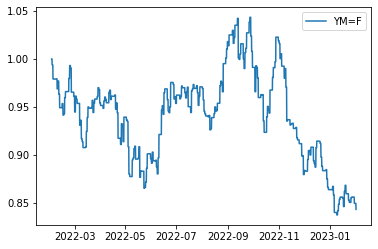

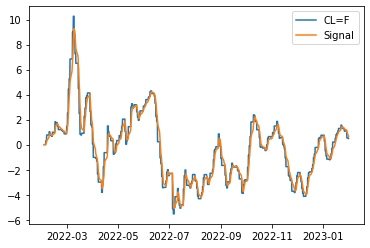

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


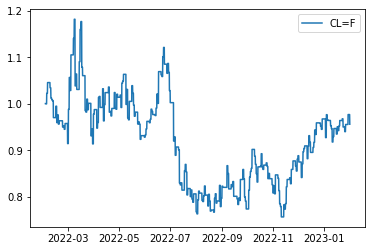

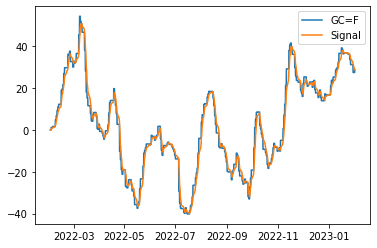

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


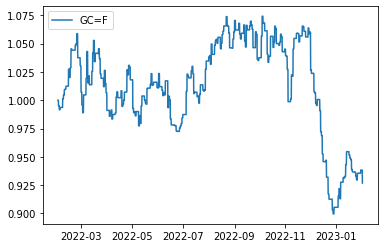

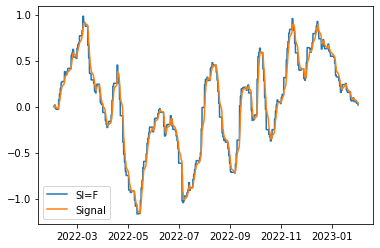

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


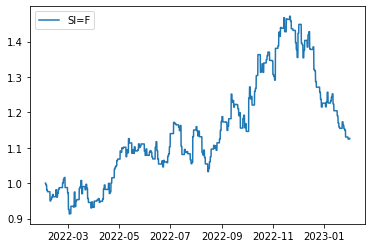

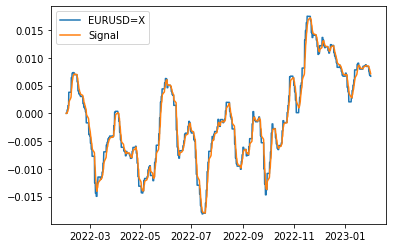

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


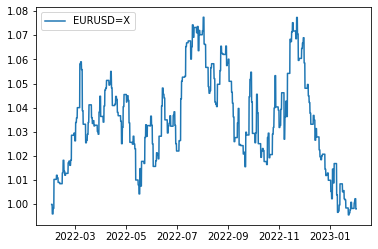

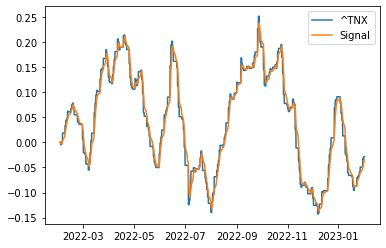

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


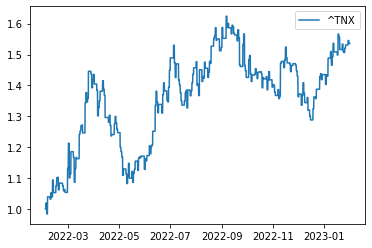

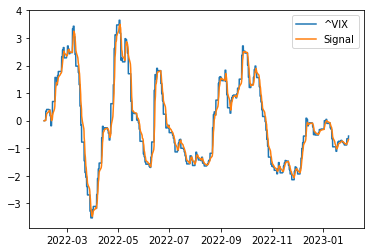

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


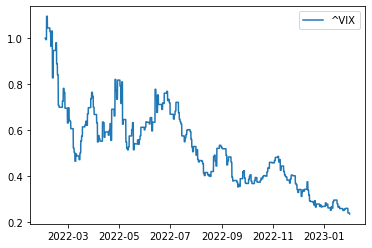

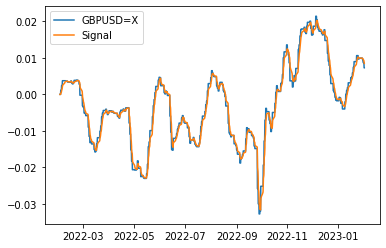

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


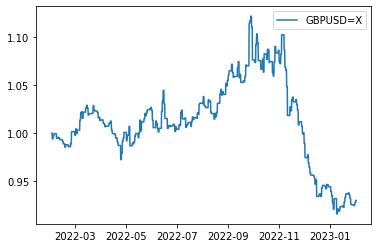

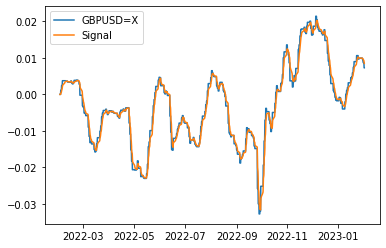

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


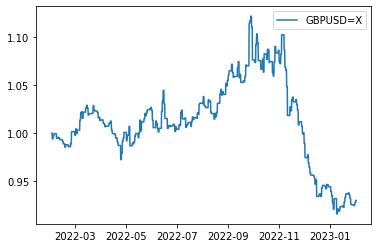

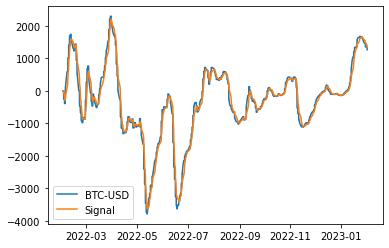

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


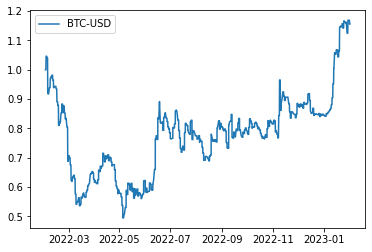

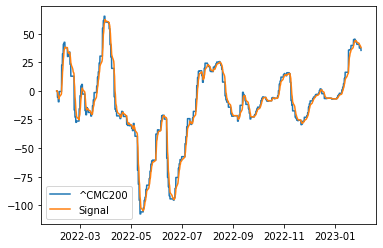

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


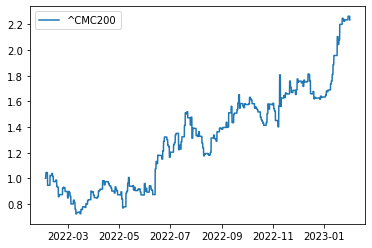

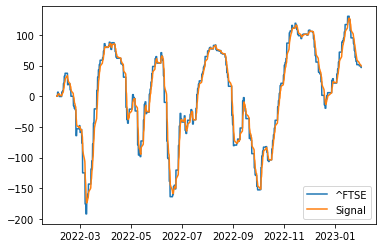

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


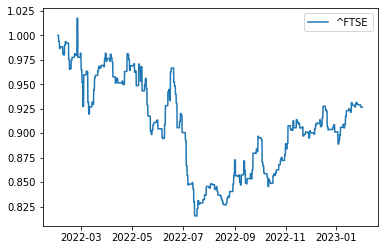

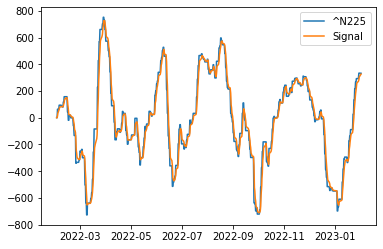

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


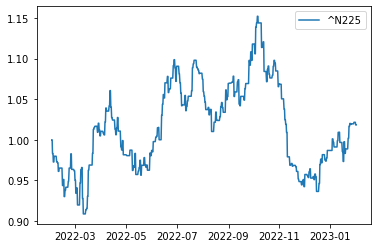

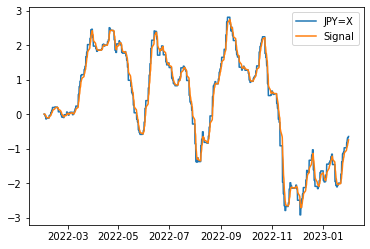

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(macd > signal, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2019247776.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


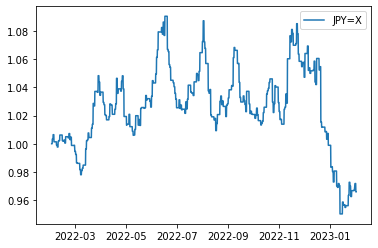

In [204]:
for s in stocks:
    df = data[s]
    fast_window = 12
    slow_window = 26
    fast_ema = df['Close'].ewm(span=fast_window, adjust=False).mean()
    slow_ema = df['Close'].ewm(span=slow_window, adjust=False).mean()

    # Calculate the MACD line
    macd = fast_ema - slow_ema

    # Calculate the signal line
    signal_window = 9
    signal = macd.ewm(span=signal_window, adjust=False).mean()

    # Plot the MACD and signal line
    plt.plot(macd, label=s)
    plt.plot(signal, label='Signal')
    plt.legend(loc='best')
    plt.show()

    # Generate buy and sell signals based on the relationship between the MACD and signal lines
    df['Position'] = np.where(macd > signal, 1, -1)

    # Calculate returns
    df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

    # Calculate cumulative returns
    cumulative_returns = (1 + df['Returns']).cumprod()

    # Plot the cumulative returns
    plt.plot(cumulative_returns,label =s)
    plt.legend(loc='best')
    plt.show()

In [207]:
df = pd.DataFrame()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


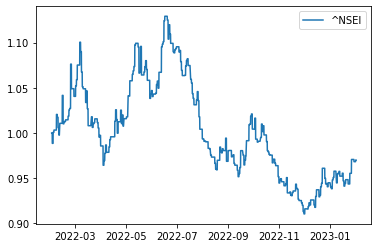

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


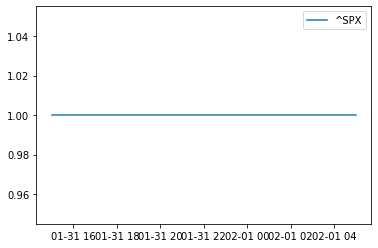

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


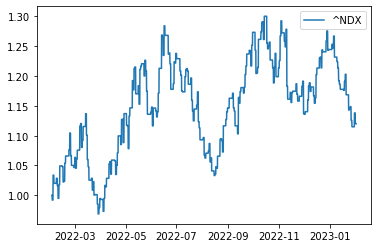

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


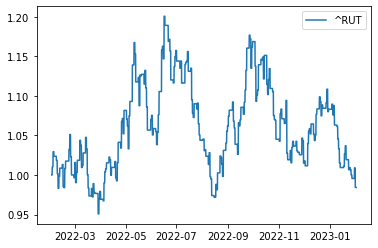

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


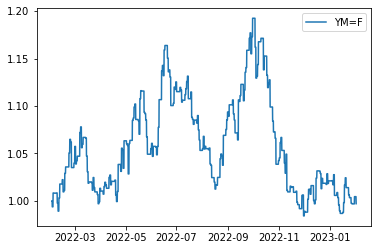

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


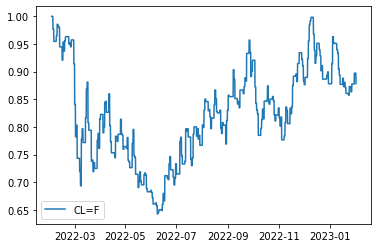

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


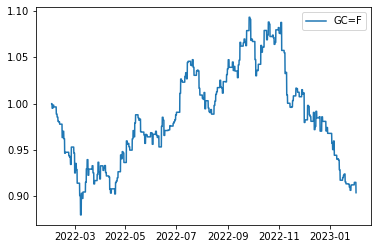

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


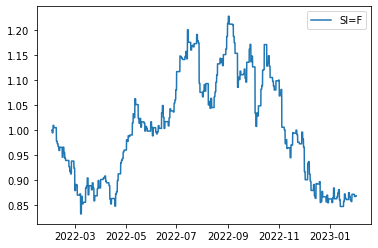

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


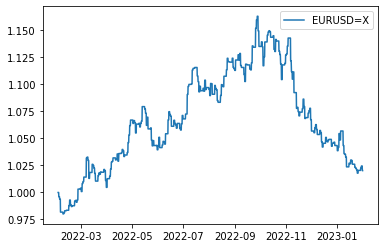

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


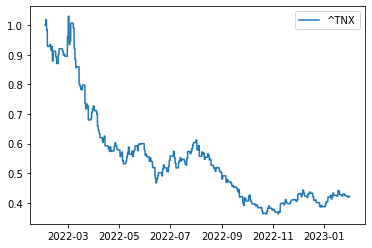

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


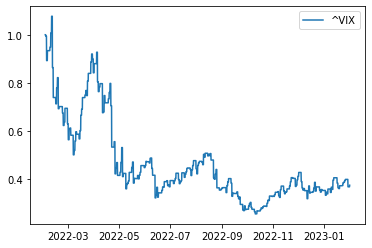

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


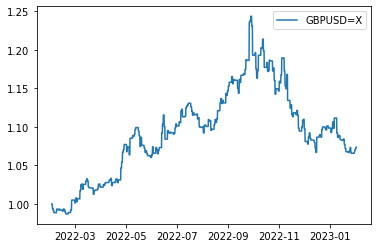

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


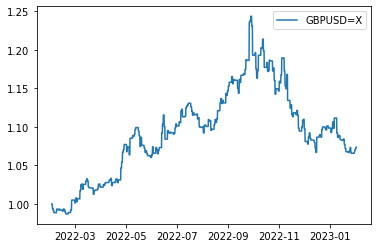

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


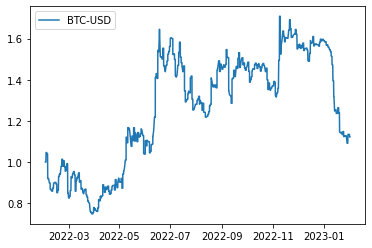

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


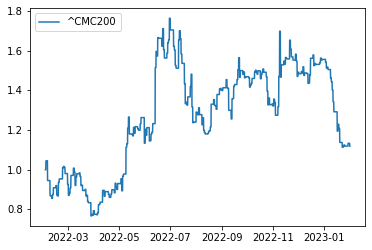

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


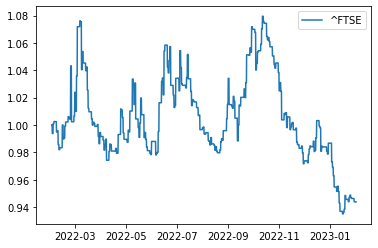

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


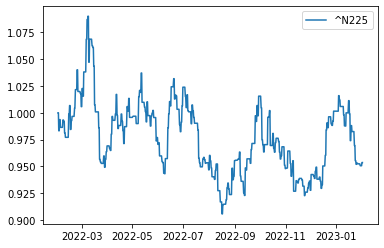

C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = np.where(k > d, 1, -1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13080\2962989136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)


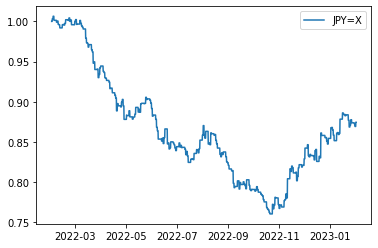

In [208]:
for s in stocks:
    df = data[s]
    window = 14

    highest_high = df['High'].rolling(window=window).max()
    lowest_low = df['Low'].rolling(window=window).min()

    k = 100 * ((df['Close'] - lowest_low) / (highest_high - lowest_low))
    d = k.rolling(window=3).mean()
    
    # Generate buy and sell signals based on the relationship between the %K and %D lines
    df['Position'] = np.where(k > d, 1, -1)

    # Calculate returns
    df['Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

    # Calculate cumulative returns
    cumulative_returns = (1 + df['Returns']).cumprod()

    # Plot the cumulative returns
    plt.plot(cumulative_returns,label=s)
    plt.legend(loc='best')
    plt.show()

In [209]:
df = pd.DataFrame()

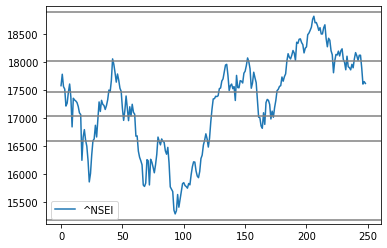

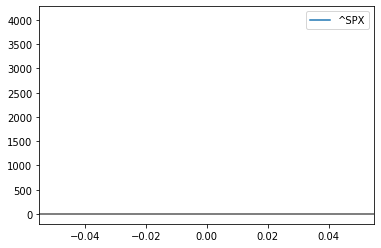

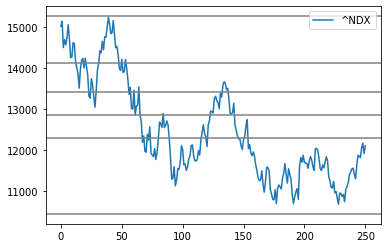

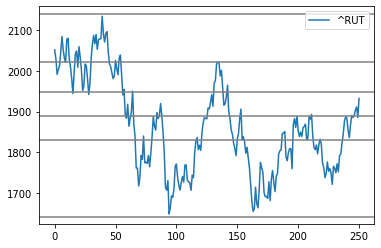

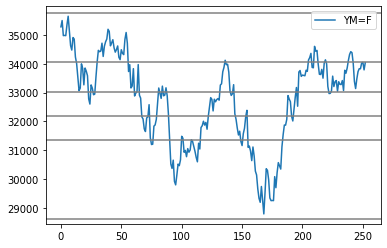

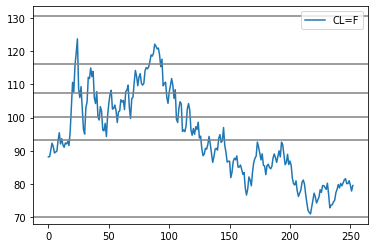

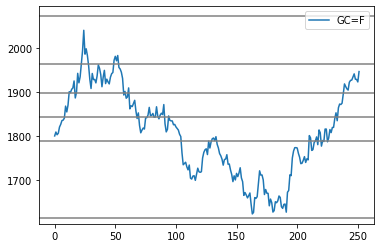

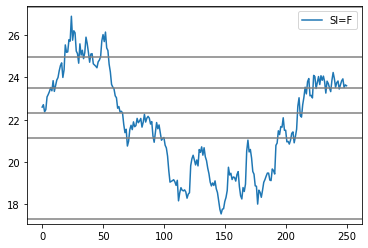

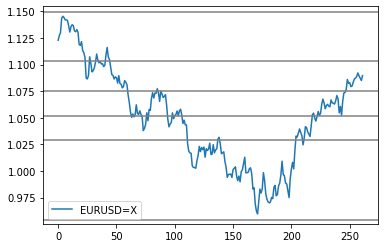

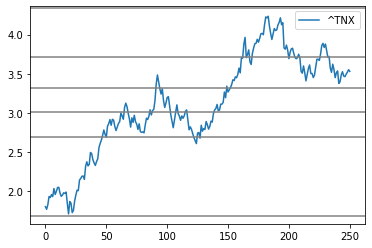

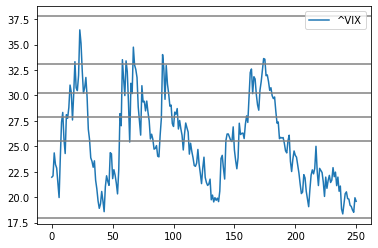

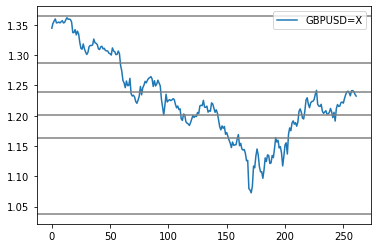

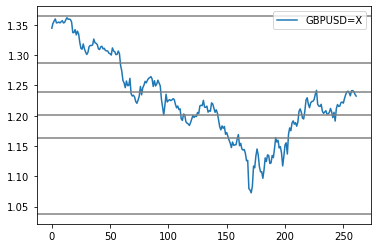

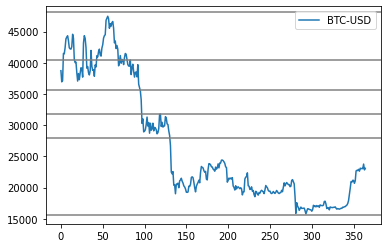

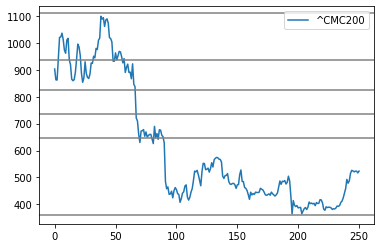

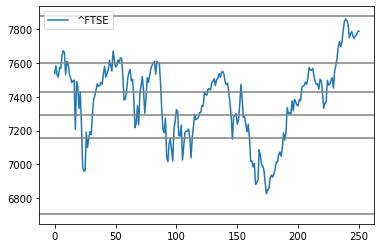

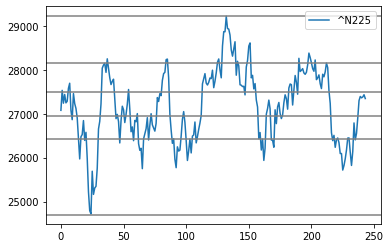

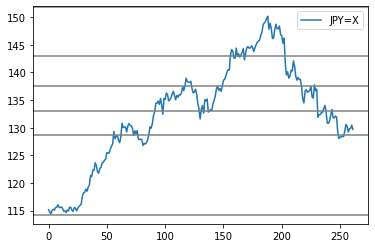

In [210]:
for s in stocks:
    df = data[s]
    # Calculate the high and low prices for the retracement
    high = df['High'].max()
    low = df['Low'].min()

    # Calculate the retracement levels
    fibonacci_levels = [0, 0.236, 0.382, 0.5, 0.618, 1.0]
    fibonacci_values = [high * (1 - level) + low * level for level in fibonacci_levels]

    # Plot the retracements
    plt.plot([x for x in df['Close'] if str(x) != 'nan'],label=s)
    for value in fibonacci_values:
        plt.axhline(value, color='grey')
    plt.legend(loc='best')
    # Show the plot
    plt.show()

In [211]:
d = list(df['Close'])

In [212]:
List = [x for x in d if str(x) != 'nan']

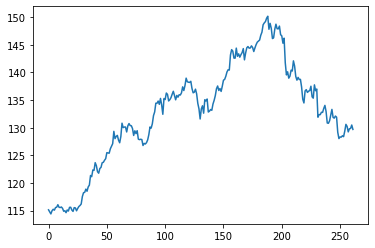

In [213]:
plt.plot(List)

In [214]:
df = pd.DataFrame

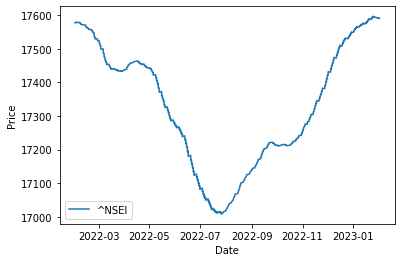

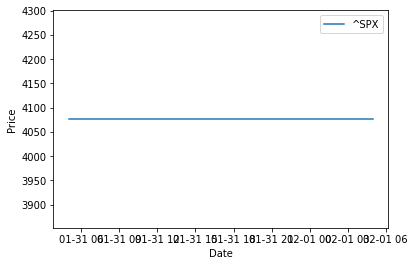

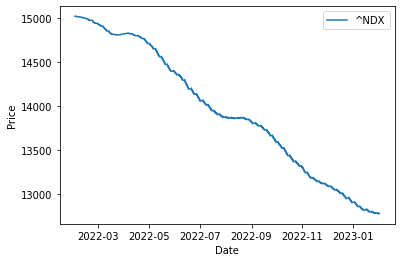

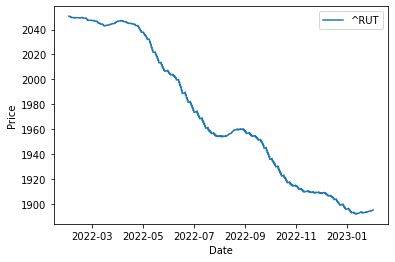

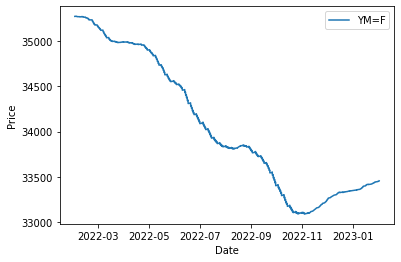

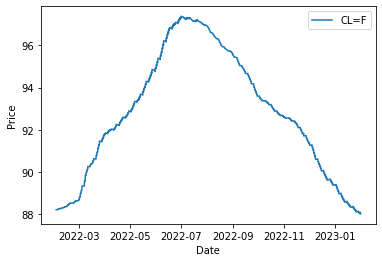

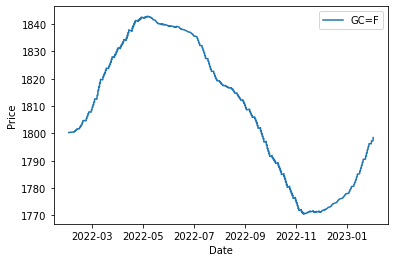

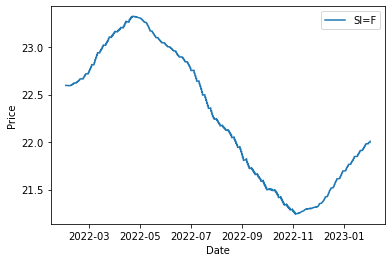

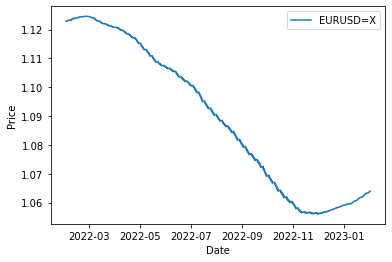

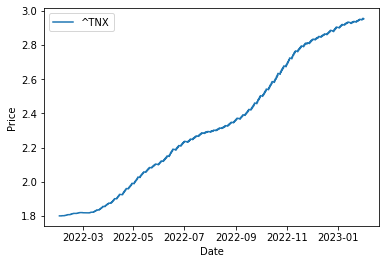

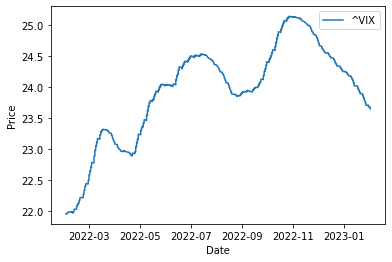

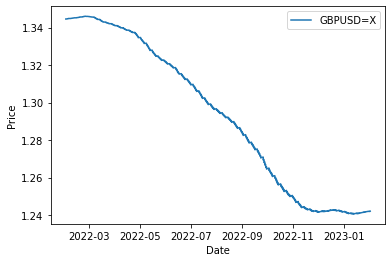

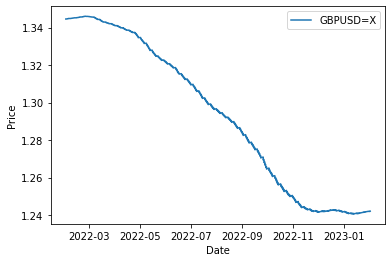

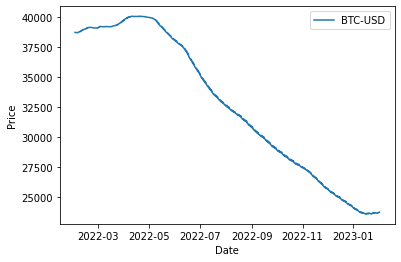

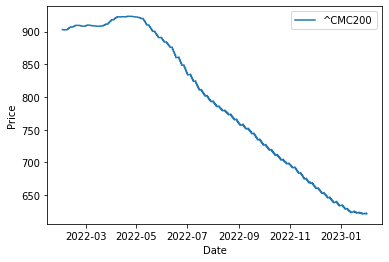

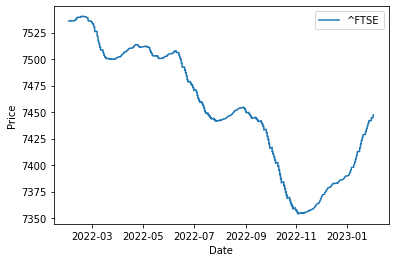

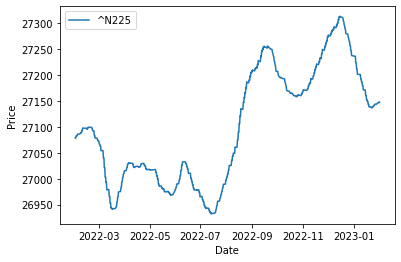

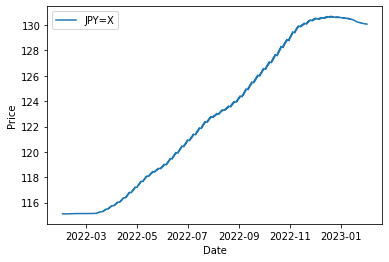

In [215]:
for s in stocks:
    df = data[s]
    df.fillna(0)
    EMA = df['Close'].ewm(span=499, adjust=False).mean()
    DEMA = 2*EMA - EMA.ewm(span=499, adjust=False).mean()
    plt.plot(DEMA,label=s)
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.show();

In [216]:
df = pd.DataFrame()

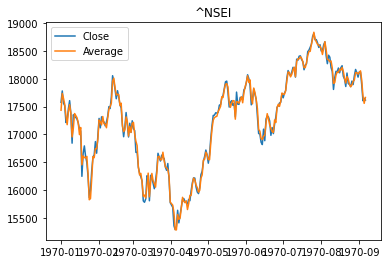

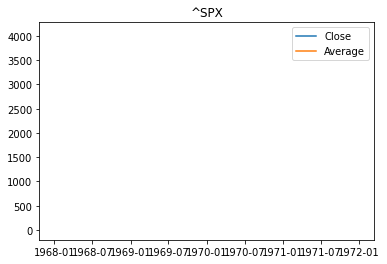

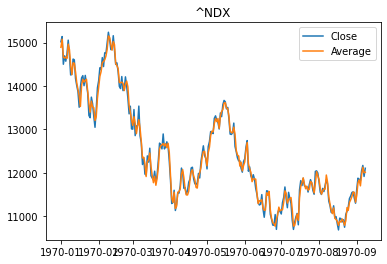

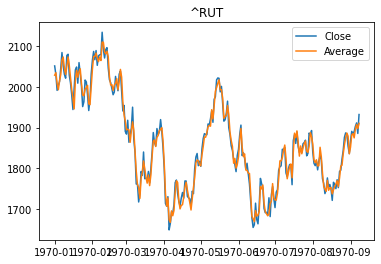

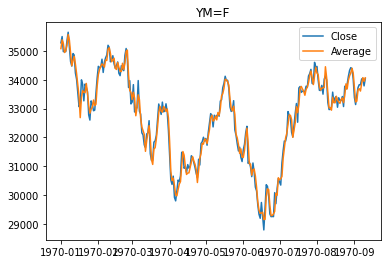

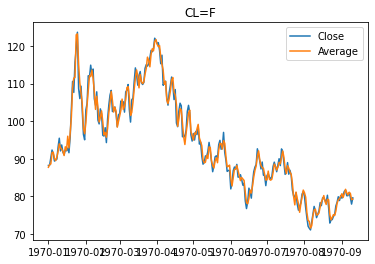

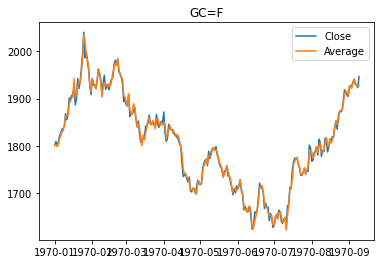

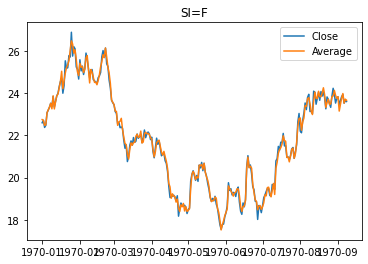

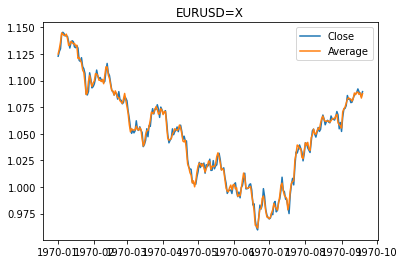

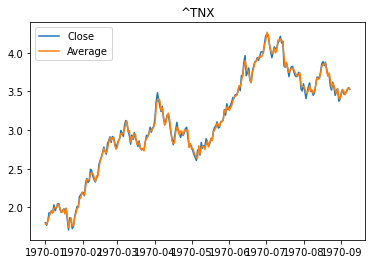

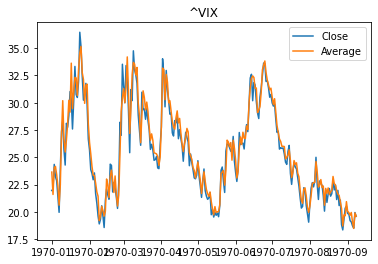

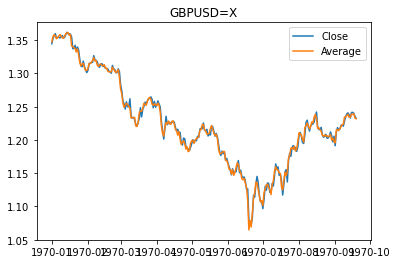

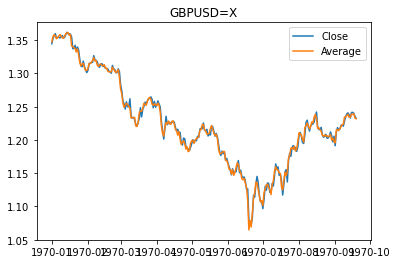

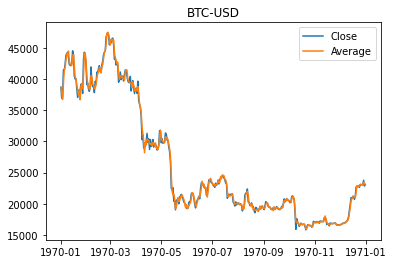

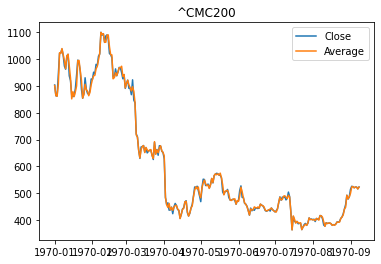

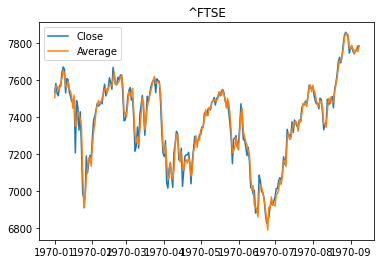

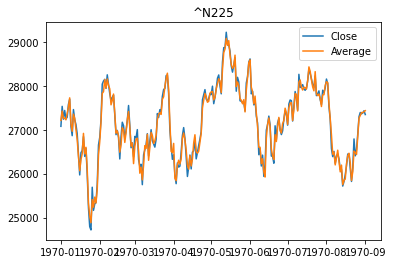

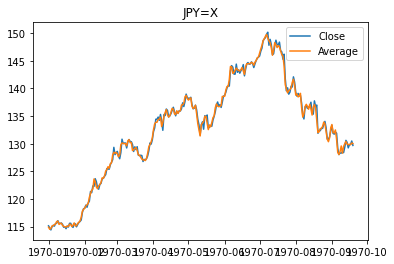

In [217]:
for s in stocks:
    df = data[s]
    average = (df['High'] + df['Low']) / 2

    # Create a boolean mask for doji candles
    doji = (df['Open'] - df['Close']).abs() < (df['High'] - df['Low']) * 0.05

    # Calculate the number of consecutive doji candles
    consecutive_doji = np.zeros_like(df['Close'])
    for i in range(1, len(df)):
        if doji[i] and doji[i-1]:
            consecutive_doji[i] = consecutive_doji[i-1] + 1
        else:
            consecutive_doji[i] = 0

    # Identify the TriStar pattern
    tristar = np.zeros_like(df['Close'])
    # Plot the TriStar pattern
    plt.plot([x for x in df['Close'] if str(x) != 'nan'], label='Close')
    plt.plot([x for x in average if str(x) != 'nan'], label='Average')
    plt.title(s)
    plt.fill_between(df.index, df['Close'], average, where=tristar==1, color='green', alpha=0.5)
    plt.legend()
    plt.show()